In [1]:
""" 
Reading saved data,
once DataFrame is read we modify it -
we change column names, modify time format, and add bus_stop_id 
"""

from Data_reading.reading import give_modified_bus_stops_df
from Data_reading.reading import give_modified_lines_stops_df
from Data_reading.reading import give_modified_curr_positions_df
from Data_reading.reading import give_modified_time_tables_df

def give_data(funct_to_get):
    # early_data = funct_to_get()
    early_data = funct_to_get(late_hours = False) # to be changed
    late_data = funct_to_get(late_hours = False)
    return [early_data, late_data]

bus_stops_dfs = give_data(give_modified_bus_stops_df)
lines_stops_dfs = give_data(give_modified_lines_stops_df)
positions_dfs = give_data(give_modified_curr_positions_df)
time_tables_dfs = give_data(give_modified_time_tables_df)

print(bus_stops_dfs[0])
print(lines_stops_dfs[0])
print(positions_dfs[0])
print(time_tables_dfs[0])

False
False


c:\Users\Admin\Desktop\rzeczy\studia\semestr_3\kurs_python\final_python_project\final_python_project\Data_analysis\Data_reading\modifying_dfs.py:62: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[Aliases.TIME.value] = pd.to_datetime(df[Aliases.TIME.value],
c:\Users\Admin\Desktop\rzeczy\studia\semestr_3\kurs_python\final_python_project\final_python_project\Data_analysis\Data_reading\modifying_dfs.py:62: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[Aliases.TIME.value] = pd.to_datetime(df[Aliases.TIME.value],


                     place  street_id        lat        lon  \
0                 Kijowska     2201.0  52.248455  21.044827   
1                 Kijowska     2201.0  52.249078  21.044443   
2                 Kijowska     2201.0  52.248928  21.044169   
3                 Kijowska     2201.0  52.249969  21.041588   
4                 Kijowska     1203.0  52.250319  21.043861   
...                    ...        ...        ...        ...   
8202  Warszawa Śródmieście     3036.0  52.229230  21.006450   
8203      Warszawa Powiśle     3036.0  52.233900  21.028760   
8204      Warszawa Powiśle     3036.0  52.233570  21.027500   
8205      Warszawa Gdańska     3036.0  52.259009  20.994033   
8206      Warszawa Gdańska     3036.0  52.259198  20.989514   

                 direction bus_stop_id  
0           al.Zieleniecka     1002002  
1                Ząbkowska     1002003  
2           al.Zieleniecka     1002004  
3                Ząbkowska     1002005  
4           al.Zieleniecka     1002006

In [3]:
from Speed.speed import give_data_with_allowed_and_not_allowed_speed
from Helpers.visualization import plot_points_on_map

     line        lon  vehicle_num                time        lat
0     119  21.205469         1000 2024-02-18 10:42:49  52.210206
1     119  20.999330         1001 2024-02-18 10:42:37  52.205878
2     213  21.102217         1002 2024-02-18 10:42:51  52.222898
3     219  21.126192         1003 2024-02-18 10:42:53  52.214930
4     213  21.177809         1004 2024-02-18 10:42:53  52.184224
...   ...        ...          ...                 ...        ...
3531  190  20.874409         9951 2024-02-18 08:17:23  52.279179
3532  190  20.875076         9952 2024-02-18 09:58:59  52.279167
3533  186  20.941530         9953 2024-02-18 10:42:13  52.332161
3534  114  20.960619         9954 2024-02-18 10:43:05  52.267094
3535  114  20.936966         9955 2024-02-18 10:42:27  52.299915

[3536 rows x 5 columns]
[(52.3210335, 20.9134475, 0.5), (52.2816715, 20.9218625, 0.5), (52.3594265, 20.8637695, 0.5), (52.360367, 20.864809, 0.5), (52.360141999999996, 20.864644, 0.5), (52.36001, 20.864573, 0.5), (52.36

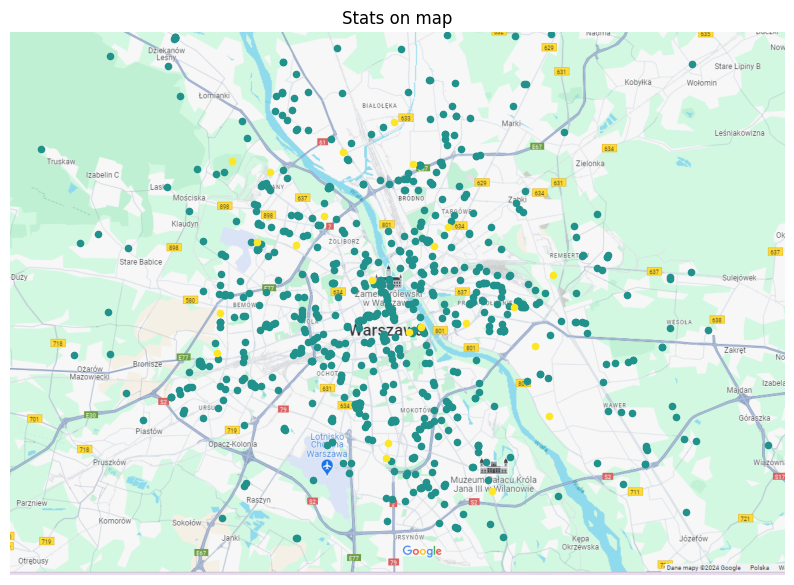

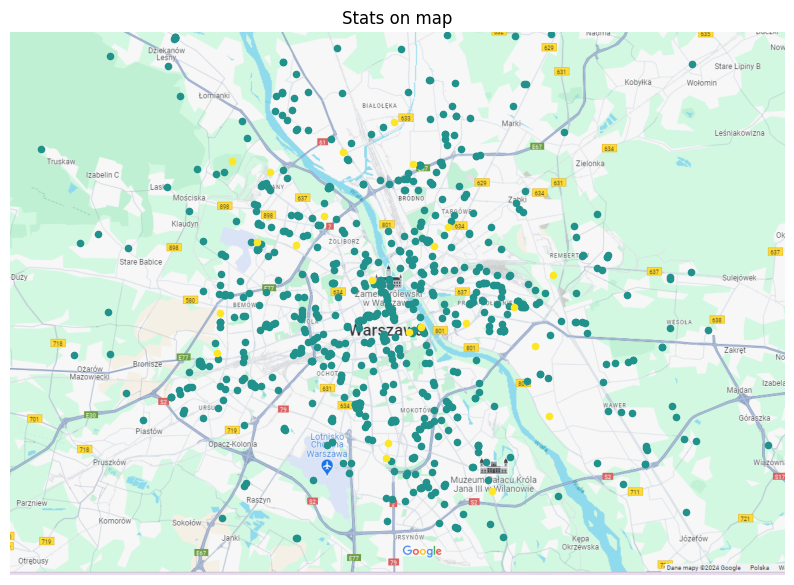

In [4]:
""" 
Here we are plotting on map two kinds of measurements:
1. buses which have speed over 50 km / h
2. the rest
(we are not considering buses over 90 km / h)
"""

print((positions_dfs[0]))
speed_data_early = give_data_with_allowed_and_not_allowed_speed(positions_dfs[0])
speed_data_late = give_data_with_allowed_and_not_allowed_speed(positions_dfs[1])
print(speed_data_late)

plot_points_on_map(speed_data_early)
plot_points_on_map(speed_data_late)

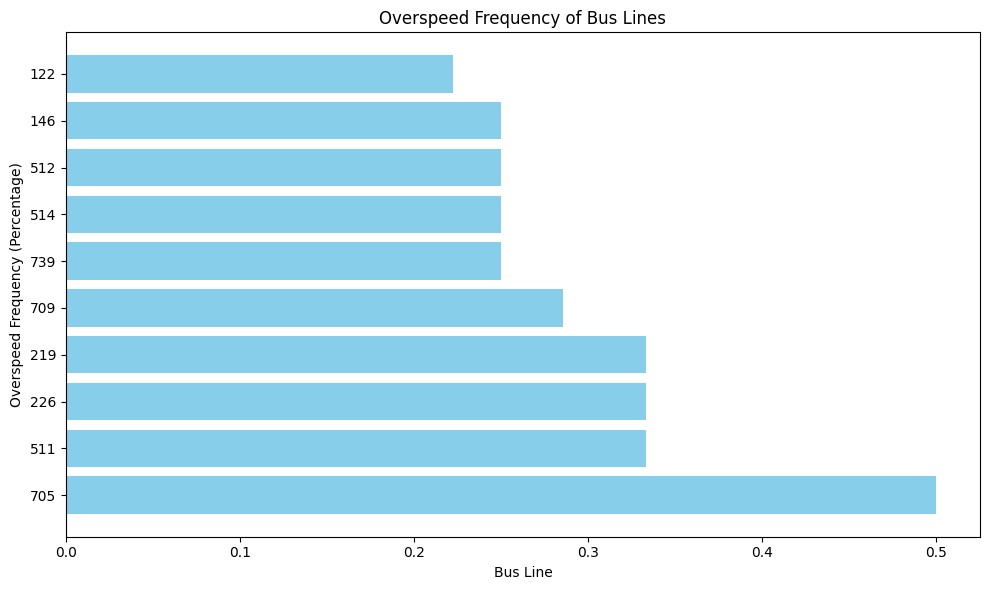

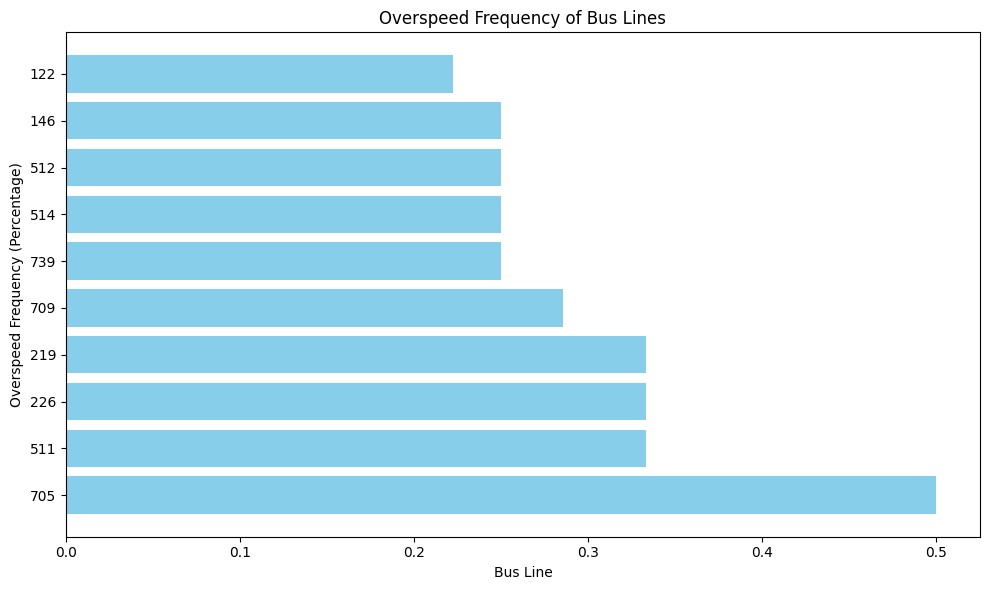

In [5]:
""" 
Now we can check for 10 fastest lines and plot them
(just for fun)
"""
from Speed.speed import give_lines_with_most_frequent_overspeed_df
from Helpers.visualization import visualize_overspeed_percentage_within_line

HOW_MANY_FAST_LINES  = 10
fast_lines_early = give_lines_with_most_frequent_overspeed_df(positions_dfs[0], 
                                                            how_many = HOW_MANY_FAST_LINES)
fast_lines_late = give_lines_with_most_frequent_overspeed_df(positions_dfs[1], 
                                                            how_many = HOW_MANY_FAST_LINES)
    
visualize_overspeed_percentage_within_line(fast_lines_early)
visualize_overspeed_percentage_within_line(fast_lines_late)
    


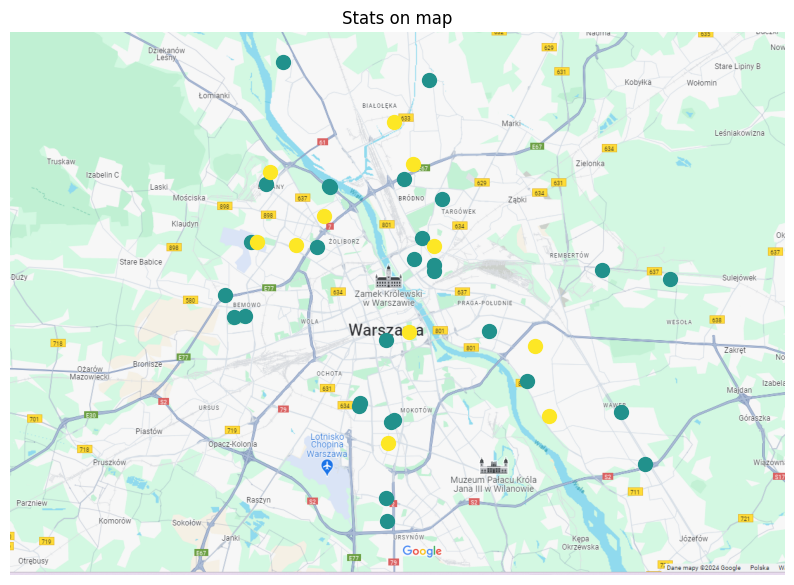

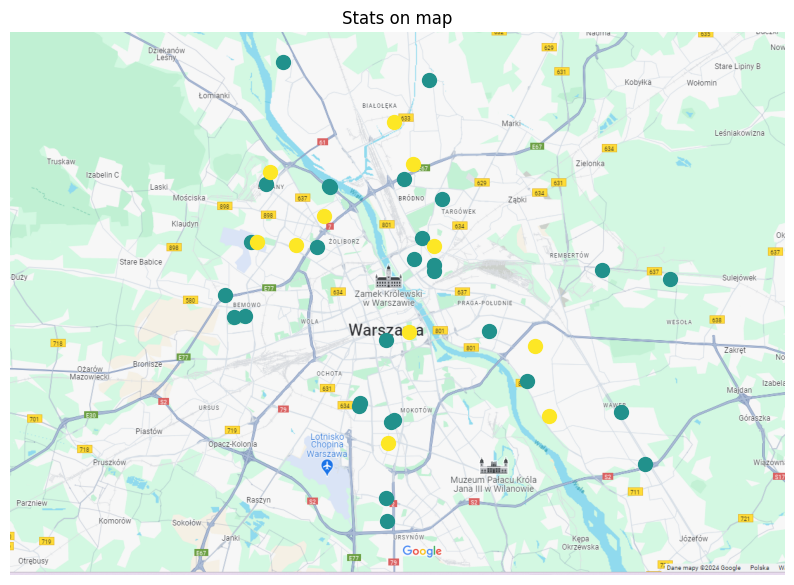

In [6]:
from Data_reading.modifying_dfs import Aliases as als

def plot_fast_lines(fast_lines, positions_df):
    pos_of_fast_lines = positions_df[positions_df[als.LINE.value].isin(fast_lines)] 

    speed_data = give_data_with_allowed_and_not_allowed_speed(pos_of_fast_lines)
    plot_points_on_map(speed_data, dot_size = 100)


plot_fast_lines(fast_lines_early[als.LINE.value], positions_dfs[0])
plot_fast_lines(fast_lines_late[als.LINE.value], positions_dfs[1])

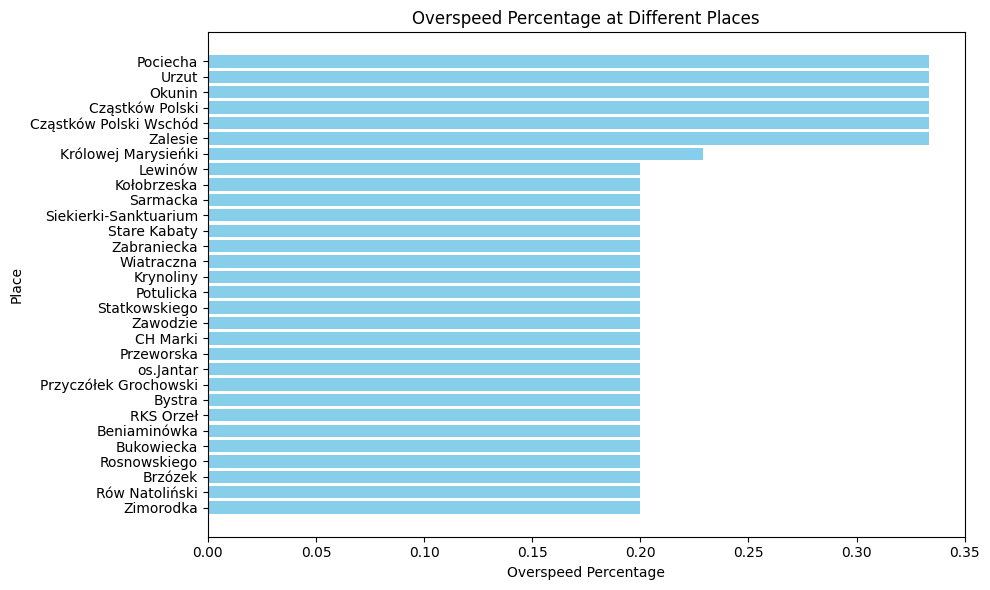

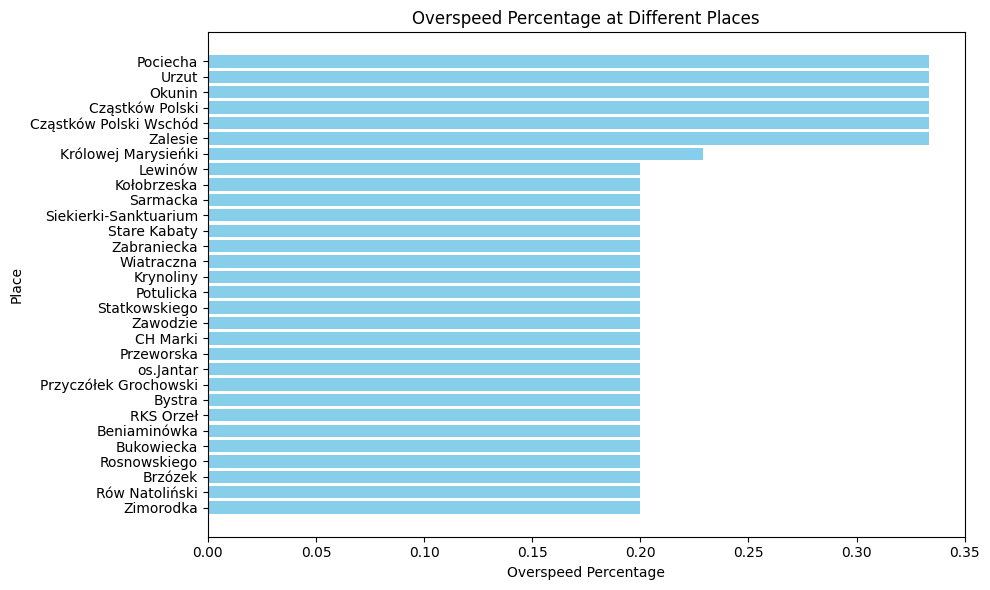

In [7]:
""" 
Now we are going to plot places around which 
overspeed was very frequent
"""

from Speed.speed import give_dataframe_of_coords_with_line_and_speed
from Speed.fast_localizations import give_fastest_places
from Helpers.visualization import visualize_overspeed_in_places

HOW_MANY = 30

speed_with_coords_early = give_dataframe_of_coords_with_line_and_speed(positions_dfs[0])
speed_with_coords_late = give_dataframe_of_coords_with_line_and_speed(positions_dfs[1])

fastest_places_early = give_fastest_places(bus_stops_dfs[0], speed_with_coords_early, how_many = HOW_MANY)
fastest_places_late = give_fastest_places(bus_stops_dfs[1], speed_with_coords_late, how_many = HOW_MANY)

visualize_overspeed_in_places(fastest_places_early)
visualize_overspeed_in_places(fastest_places_late)


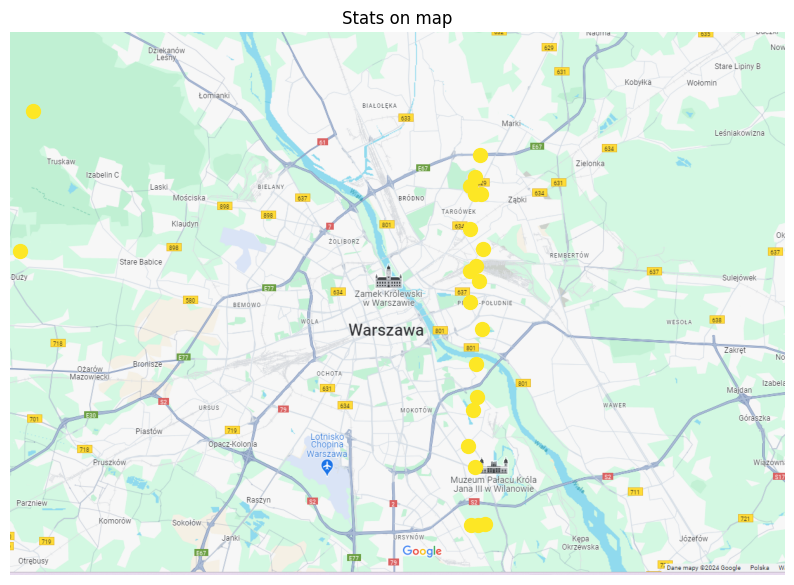

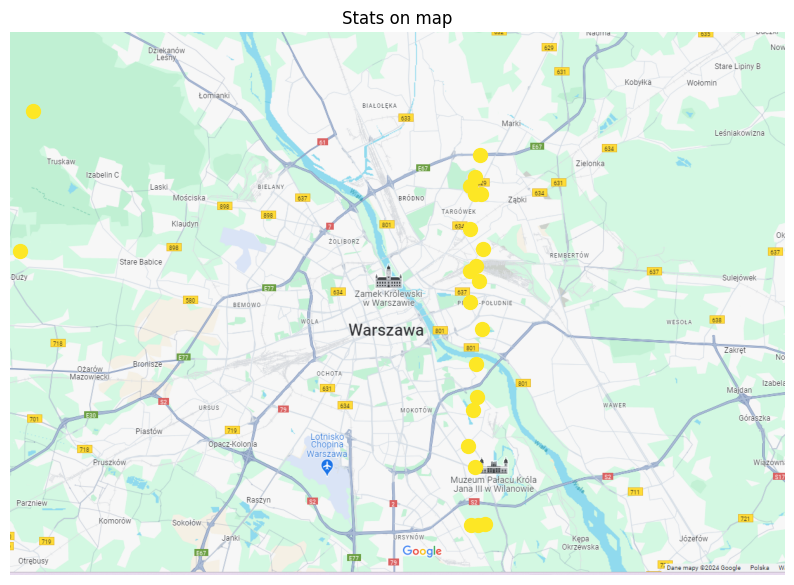

In [8]:
from Speed.fast_localizations import give_places_coords_to_plot_on_map

fastest_places_coords_data_early = give_places_coords_to_plot_on_map(fastest_places_early,
                                                                     bus_stops_dfs[0])
fastest_places_coords_data_late = give_places_coords_to_plot_on_map(fastest_places_late,
                                                                     bus_stops_dfs[1])

plot_points_on_map(fastest_places_coords_data_early, dot_size=100)
plot_points_on_map(fastest_places_coords_data_late, dot_size = 100)

In [9]:
from Punctuality.arrivals import give_df_with_arrivals

arrivals_df_early = give_df_with_arrivals(positions_dfs[0], lines_stops_dfs[0], bus_stops_dfs[0])
arrivals_df_late = give_df_with_arrivals(positions_dfs[1], lines_stops_dfs[1], bus_stops_dfs[1])


In [10]:
from Punctuality.punctuality import give_df_with_avg_delay_on_bus_stop 
from Punctuality.punctuality import give_df_with_expected_waiting_time_on_bus_stop 

expected_waiting_early = give_df_with_expected_waiting_time_on_bus_stop(arrivals_df_early, 
                                                                       positions_dfs[0])
expected_waiting_late = give_df_with_expected_waiting_time_on_bus_stop(arrivals_df_late, 
                                                           positions_dfs[1])

delays_early = give_df_with_avg_delay_on_bus_stop(arrivals_df_early, time_tables_dfs[0])
delays_late = give_df_with_avg_delay_on_bus_stop(arrivals_df_early, time_tables_dfs[1])

from Punctuality.prep_to_visualize import most_delayed_bus_stops_data
from Punctuality.prep_to_visualize import shortest_expected_waiting_bus_stops
from Punctuality.prep_to_visualize import bus_stops_to_plot_on_map_where_better_random_time


[Timestamp('2024-02-18 10:43:06')]
[Timestamp('2024-02-18 10:42:44')]
[Timestamp('2024-02-18 10:43:00')]
[Timestamp('2024-02-18 10:42:49')]
[Timestamp('2024-02-18 10:42:55')]
[Timestamp('2024-02-18 10:43:01')]
[Timestamp('2024-02-18 10:42:55')]
[Timestamp('2024-02-18 10:42:51')]
[Timestamp('2024-02-18 10:43:06')]
[Timestamp('2024-02-18 10:42:44')]
[Timestamp('2024-02-18 10:43:00')]
[Timestamp('2024-02-18 10:42:49')]
[Timestamp('2024-02-18 10:42:55')]
[Timestamp('2024-02-18 10:43:01')]
[Timestamp('2024-02-18 10:42:55')]
[Timestamp('2024-02-18 10:42:51')]


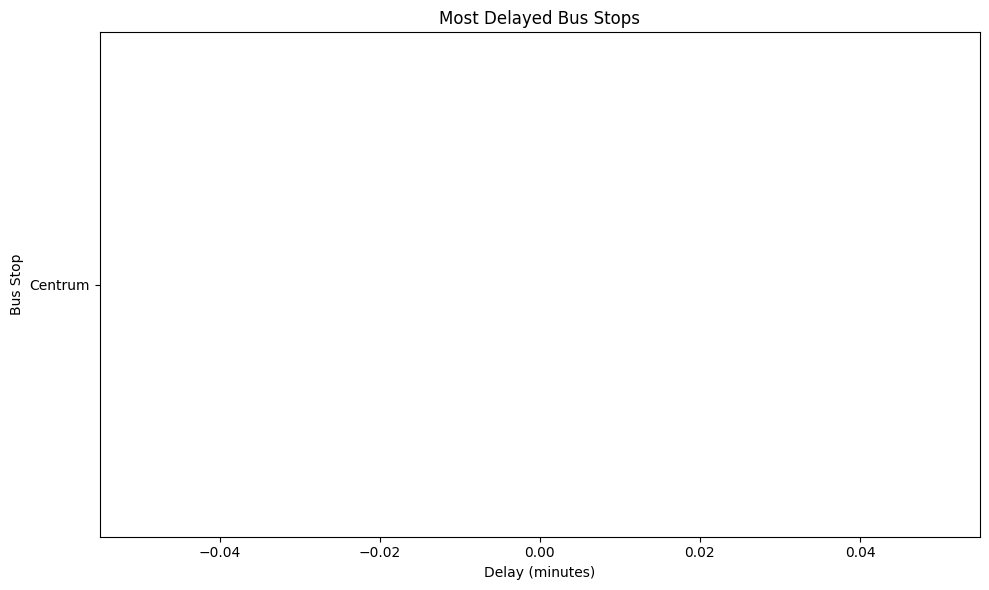

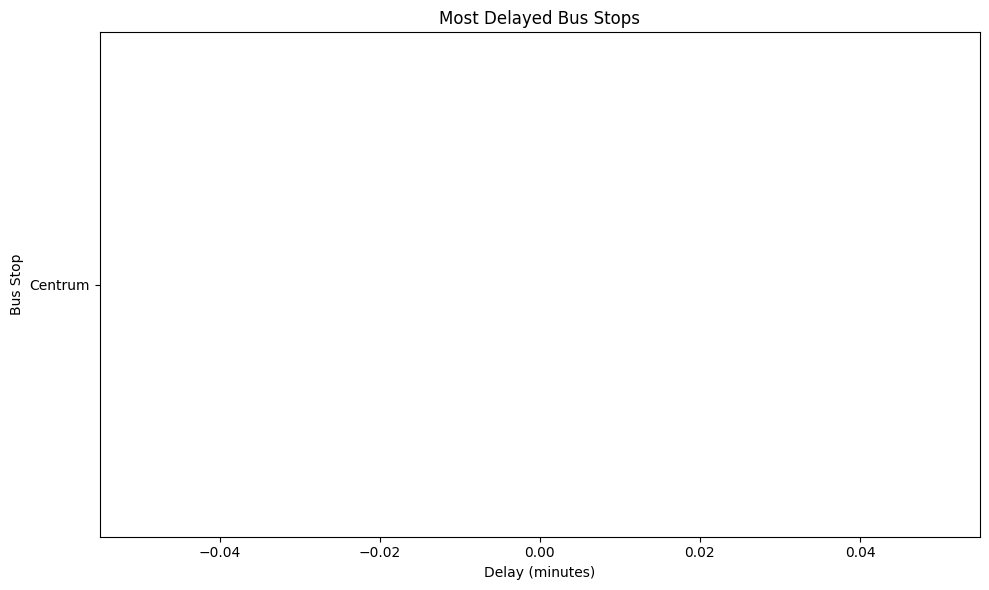

In [11]:
from Punctuality.prep_to_visualize import most_delayed_bus_stops_data

from Helpers.visualization import plot_most_delayed_bus_stops

HOW_MANY = 15

def plot_delays(delays_df, how_many = 20):
    df = most_delayed_bus_stops_data(delays_df, bus_stops_dfs[0], how_many)
    plot_most_delayed_bus_stops(df)
    
plot_delays(delays_early, HOW_MANY)
plot_delays(delays_late, HOW_MANY)


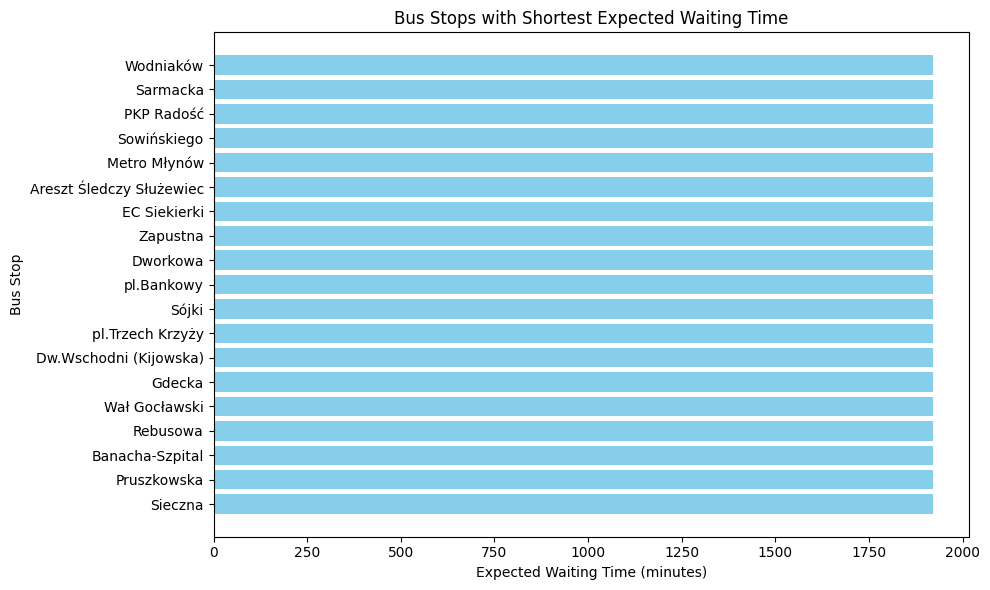

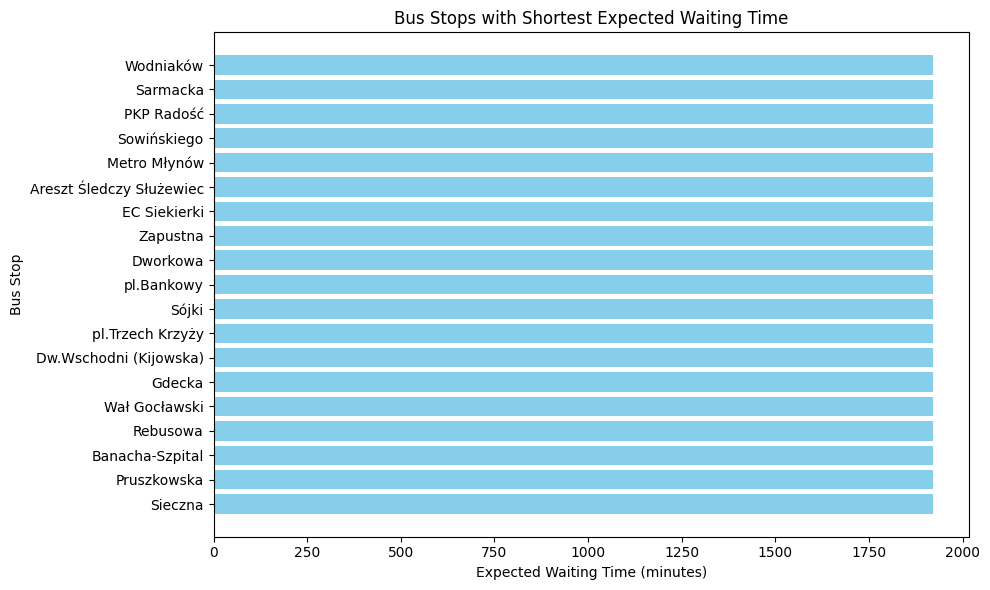

In [12]:
from Punctuality.prep_to_visualize import shortest_expected_waiting_bus_stops

from Helpers.visualization import plot_shortest_expected_waiting_bus_stops

def plot_expected_waiting_time(expected_time_df, how_many = 20):
    df = shortest_expected_waiting_bus_stops(expected_time_df, bus_stops_dfs[0], how_many)
    plot_shortest_expected_waiting_bus_stops(df)
    
plot_expected_waiting_time(expected_waiting_early)
plot_expected_waiting_time(expected_waiting_late)

[[52.150858, 21.046991, 1]]


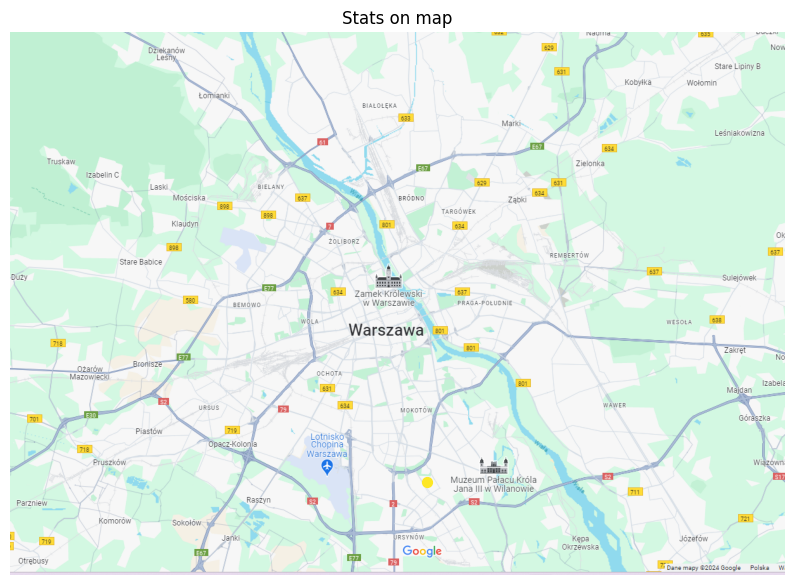

[[52.150858, 21.046991, 1]]


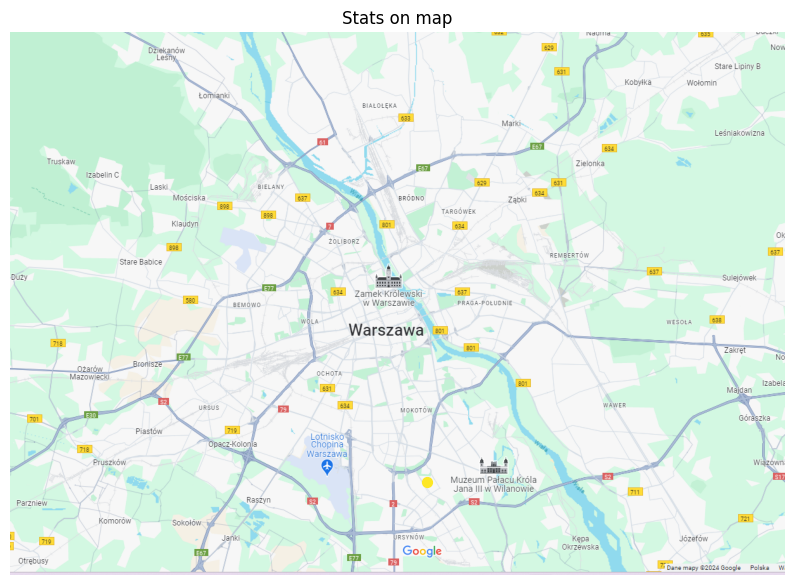

In [ ]:
from Punctuality.prep_to_visualize import bus_stops_to_plot_on_map_where_better_random_time

PLANNING_DELAY = 100000
DOT_SIZE = 50

def plot_bus_stops_where_better_random_time(delays_df, expected_waiting_df):
    data_to_plot = bus_stops_to_plot_on_map_where_better_random_time(delays_df,
                                                                     expected_waiting_df,
                                                                     bus_stops_dfs[0],
                                                                     PLANNING_DELAY)
    print(data_to_plot)
    plot_points_on_map(data_to_plot, dot_size = DOT_SIZE)
    
plot_bus_stops_where_better_random_time(delays_early, expected_waiting_early)
plot_bus_stops_where_better_random_time(delays_late, expected_waiting_late)